In [1]:
import pandas as pd

In [8]:
df = pd.read_excel('/content/dados_cerveja.xlsx')
df

,id,temperatura,copo,espuma,cor,classe
0,1,-5,mud,não,escura,weissbier
1,2,-5,mud,sim,escura,weissbier
2,3,-1,pint,não,clara,weissbier
3,4,-1,pint,sim,clara,weissbier
4,5,-5,pint,não,escura,pale-ale
5,6,-5,pint,não,clara,pale-ale
6,7,-5,pint,sim,escura,pale-ale
7,8,-1,mud,não,clara,pilsen
8,9,-5,mud,não,clara,pilsen
9,10,-1,mud,sim,clara,pilsen


In [12]:
features = ['temperatura', 'copo', 'espuma', 'cor']
target = ['classe']

x = df[features]
y = df[target]

In [13]:
x = x.replace({ 'mud':1, 'pint':0, 'sim':1, 'não':0, 'escura':1, 'clara':0})

x


<ipython-input-13-3846910629>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x = x.replace({ 'mud':1, 'pint':0, 'sim':1, 'não':0, 'escura':1, 'clara':0})


,temperatura,copo,espuma,cor
0,-5,1,0,1
1,-5,1,1,1
2,-1,0,0,0
3,-1,0,1,0
4,-5,0,0,1
5,-5,0,0,0
6,-5,0,1,1
7,-1,1,0,0
8,-5,1,0,0
9,-1,1,1,0


In [17]:
from sklearn import tree
import matplotlib.pyplot as plt

In [16]:
arvore = tree.DecisionTreeClassifier()
arvore.fit(x,y)

DecisionTreeClassifier()

[Text(0.5, 0.875, 'copo <= 0.5\ngini = 0.653\nsamples = 12\nvalue = [3, 5, 4]\nclass = pilsen'),
 Text(0.25, 0.625, 'temperatura <= -3.0\ngini = 0.48\nsamples = 5\nvalue = [3, 0, 2]\nclass = pale-ale'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0]\nclass = pale-ale'),
 Text(0.375, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]\nclass = weissbier'),
 Text(0.75, 0.625, 'temperatura <= -3.0\ngini = 0.408\nsamples = 7\nvalue = [0, 5, 2]\nclass = pilsen'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'cor <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]\nclass = weissbier'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = pilsen'),
 Text(0.75, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]\nclass = weissbier'),
 Text(0.875, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [0, 4, 0]\nclass = pilsen')]

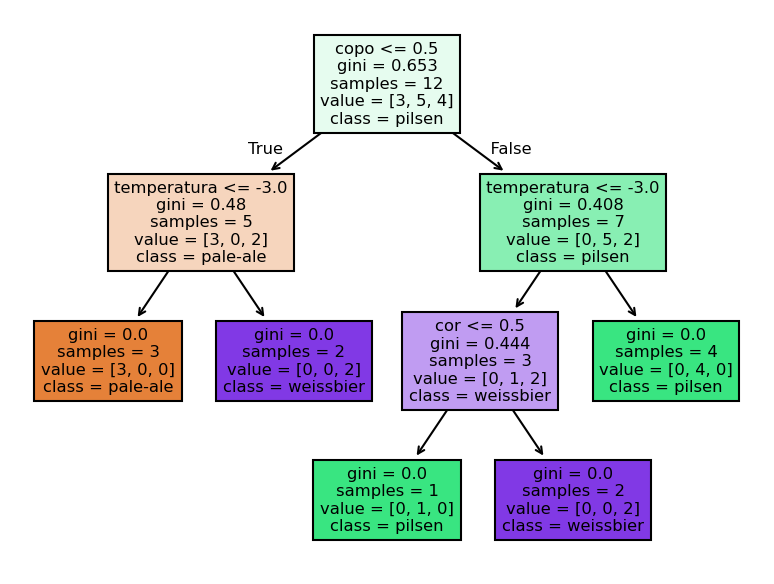

In [20]:
plt.figure(dpi=150)
tree.plot_tree(arvore, class_names=arvore.classes_, feature_names = features, filled=True)

In [24]:
#['temperatura', 'copo', 'espuma', 'cor']
probas = arvore.predict_proba([[-1,1,0,1]])[0]
pd.Series(probas, index=arvore.classes_)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


,0
pale-ale,0.0
pilsen,1.0
weissbier,0.0
